### Predict an employee's access needs, given his/her job role

When an employee at any company starts work, they first need to obtain the computer access necessary to fulfill their role. This access may allow an employee to read/manipulate resources through various applications or web portals. It is assumed that employees fulfilling the functions of a given role will access the same or similar resources. It is often the case that employees figure out the access they need as they encounter roadblocks during their daily work (e.g. not able to log into a reporting portal). A knowledgeable supervisor then takes time to manually grant the needed access in order to overcome access obstacles. As employees move throughout a company, this access discovery/recovery cycle wastes a nontrivial amount of time and money.

There is a considerable amount of data regarding an employee’s role within an organization and the resources to which they have access. Given the data related to current employees and their provisioned access, models can be built that automatically determine access privileges as employees enter and leave roles within a company. These auto-access models seek to minimize the human involvement required to grant or revoke employee access.

### Objective

In [1]:
# Import libraries to be used
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Read the training and testing data
train = pd.read_csv('amazon_train.csv')
test = pd.read_csv('amazon_test.csv')
train.tail()
test.tail()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
58916,58917,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,58918,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,58919,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,58920,1023,8674,117961,118327,120318,118321,117906,290919,118322
58920,58921,44977,3918,117961,118343,118660,119433,133686,118424,119435


#### Notice how the test data has an 'id'  feature and the train data doesn't. This will affect our prediction 

In [3]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [4]:
# split the train data into X and y
# y = action (1 or 0) , X is everything else

features = ['RESOURCE', 'MGR_ID','ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']
X = train[features]
y = train['ACTION']
X_test_class = test[features]

In [5]:
# perform train_test_split using default settings.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)


### Testing accuracy for Logistic Regresssion

In [6]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
#make predictions for the testing set 
y_pred_logreg = logreg.predict(X_test)

In [8]:
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_logreg)

0.945807396558


### Testing accuracy for Naive Bayes

In [9]:
# train a naiye bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred_gnb = gnb.predict(X_test)

In [11]:
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_gnb)

0.91688026364


### Testing accuracy for KNN

In [12]:
# train a KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =26)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=26, p=2,
           weights='uniform')

In [13]:
y_pred_knn = knn.predict(X_test)

In [14]:
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_knn)

0.945929451971


### Testing accuracy for SVM

In [15]:
# train a SVM model
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_pred_svm  = svc.predict(X_test)

In [17]:
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_svm)

0.946051507384


### Testing for Gradient Boosting Classifier

### Null accuracy

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [19]:
y_pred_gbm  = gbm.predict(X_test)

In [20]:
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_gbm)

0.947150006103


### Compute frequency distribution of 1s and 0s 

In [21]:
y_test.value_counts()

1    7749
0     444
dtype: int64

In [22]:
# calculate the percentage of ones
y_test.mean()

0.94580739655803736

In [23]:
# calculate the percentage of zeros
1-y_test.mean()

0.054192603441962639

This tells us that if we use a dumb model that predicts 1 all the time, we'd have a 94% accuracy and if we predicted a 0 all the time, we'd have 5% accuracy. Suddenly, our models don't look so good. SVM provides the highest accuracy of 94.6%

In [24]:
print("The best value for knn is:", metrics.accuracy_score(y_test, y_pred_knn))
print("The best value for LogisticRegression is:",metrics.accuracy_score(y_test, y_pred_logreg) )
print("The best value for svm is:", metrics.accuracy_score(y_test, y_pred_svm))
print("The best value for gbm is:", metrics.accuracy_score(y_test, y_pred_gbm))
print("The best value for naive bayes is:",metrics.accuracy_score(y_test, y_pred_gnb) )

('The best value for knn is:', 0.94592945197119493)
('The best value for LogisticRegression is:', 0.94580739655803736)
('The best value for svm is:', 0.94605150738435251)
('The best value for gbm is:', 0.94715000610277067)
('The best value for naive bayes is:', 0.91688026363969244)


### Getting the best parameters on GBM using GridSearchCV

In [25]:
# Select grid parameters and train grid object
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              # 'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
              }
grid = GridSearchCV(gbm, param_grid, cv = 10, scoring = 'accuracy')

In [26]:
# fit our grid object with X_train and y_train
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6], 'min_samples_leaf': [3, 5, 9, 17]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [27]:
print ('The best score is: ', grid.best_score_)
print ('The best parameters are: ',grid.best_params_)
print ('The best Classification is: ',grid.best_estimator_)

('The best score is: ', 0.9447021484375)
('The best parameters are: ', {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 9})
('The best Classification is: ', GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=9, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))


### Classifiy based on predicted probabilities 

In [28]:
# 
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### ROC curves

In [29]:
#y_pred = logreg.predict_proba(X_test)[:, 1]

y_pred = logreg.predict_proba(X_test)[:, 1]
#from sklearn.preprocessing import binarize
#y_pred = binarize(y_pred, 0.9)[0]
#df = pd.DataFrame({'id': test.id, 'Action': y_pred})
#df.tail()
#df.to_csv('kagglesubmission.csv')
#scores about .88

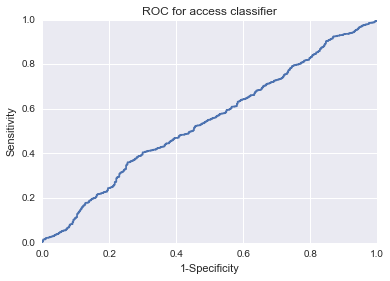

In [30]:
#
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.title('ROC for access classifier')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')




In [31]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print 'Sensitivity: ', tpr[thresholds > threshold][-1]
    print 'Specificity: ', 1-fpr[thresholds > threshold][-1]
    

In [32]:
evaluate_threshold(0.9)

Sensitivity:  0.993934701252
Specificity:  0.0


In [33]:
#Compute AUC
print metrics.roc_auc_score(y_test, y_pred)

0.542636132067
